In [9]:
# Necessary imports\n",
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
file_name = os.path.join(os.getcwd(), "final_dataset.csv")
df = pd.read_csv(file_name, header=0)

AVG TEMP & COVID (4 States: Washington, Wyoming, Missouri, Georgia)

~ TIME SERIES PLOT

C:\Users\madis\AppData\Local\Temp\ipykernel_40464\2815118078.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


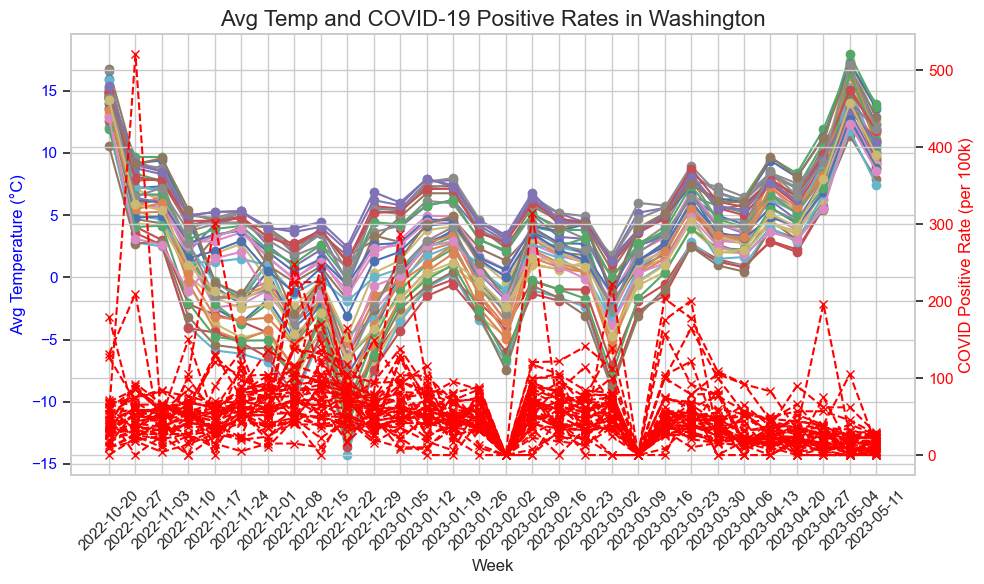

C:\Users\madis\AppData\Local\Temp\ipykernel_40464\2815118078.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


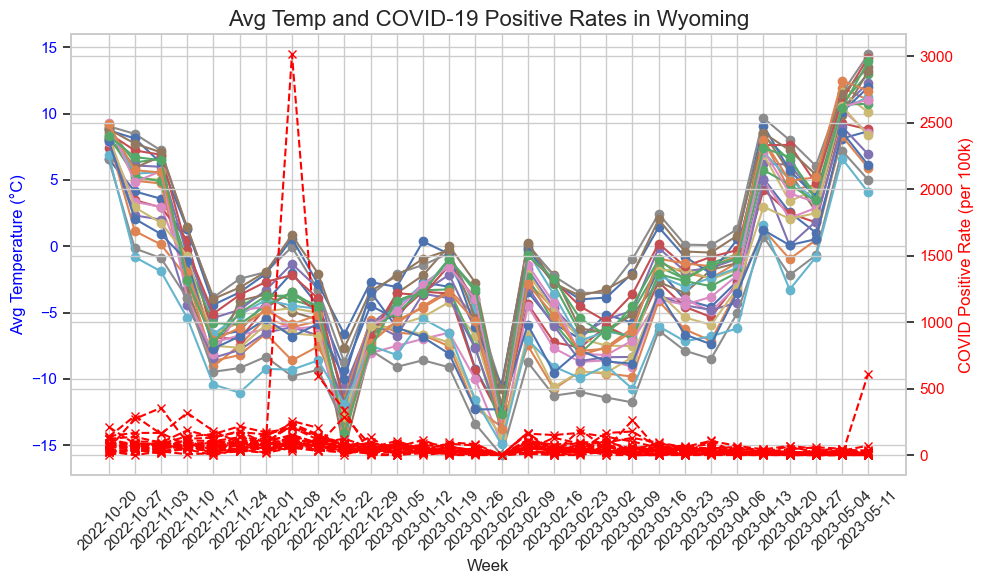

C:\Users\madis\AppData\Local\Temp\ipykernel_40464\2815118078.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


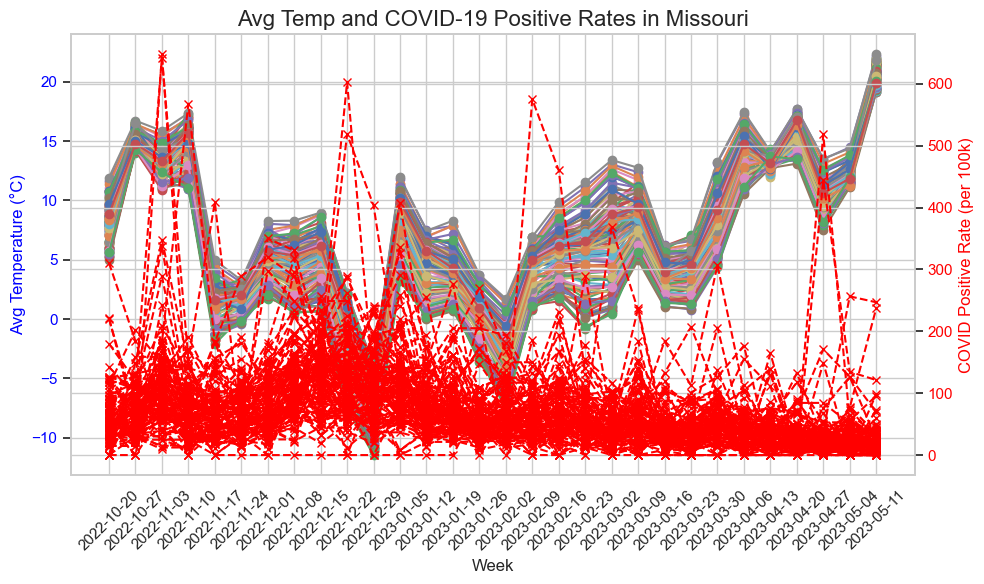

C:\Users\madis\AppData\Local\Temp\ipykernel_40464\2815118078.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


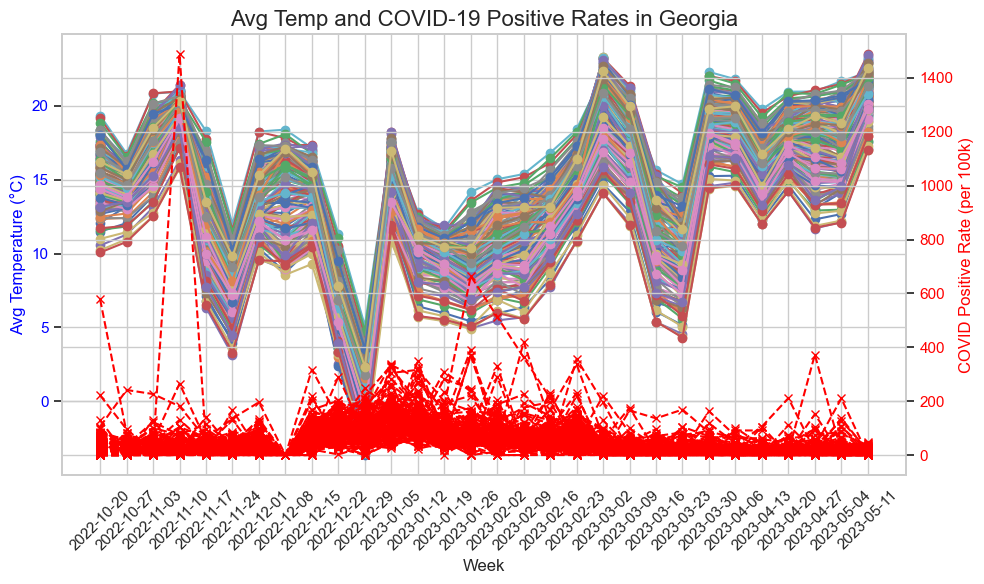

In [11]:
list = ['Washington', 'Wyoming', 'Missouri', 'Georgia']

for state in list:
    df_state = df[df['State'] == state]
    fig, ax1 = plt.subplots(figsize=(10, 6))

    #group features we want to display
    df_grouped = df_state.groupby(['County', 'Week']).agg({   
        'Avg Temp': 'mean',
        'cases_per_100K_7_day_count_change': 'mean'
    }).reset_index()

    #plot avg temp
    for county in df_grouped['County'].unique():
        county_data = df_grouped[df_grouped['County'] == county]
        plt.plot(county_data['Week'], county_data['Avg Temp'], marker='o', label=f'{county}')

    #set labels for y-axis 1(avg temp)
    ax1.set_xlabel('Week')
    ax1.set_ylabel('Avg Temperature (°C)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    #create y-axis 2(covid positive rates)
    ax2 = ax1.twinx()

    #plot covid positive rates
    for county in df_grouped['County'].unique():
        county_data = df_grouped[df_grouped['County'] == county]
        ax2.plot(county_data['Week'], county_data['cases_per_100K_7_day_count_change'], marker='x', linestyle='--', color='red')

    #set labels for y-axis 2(covid postive rates)
    ax2.set_ylabel('COVID Positive Rate (per 100k)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    #rotate week ticks
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

    #title and layout
    plt.title(f'Avg Temp and COVID-19 Positive Rates in {state}', fontsize=16)
    fig.tight_layout()

    plt.show()


~ PAIR PLOT

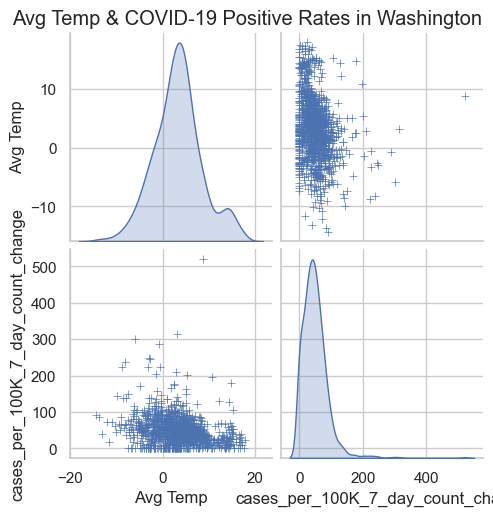

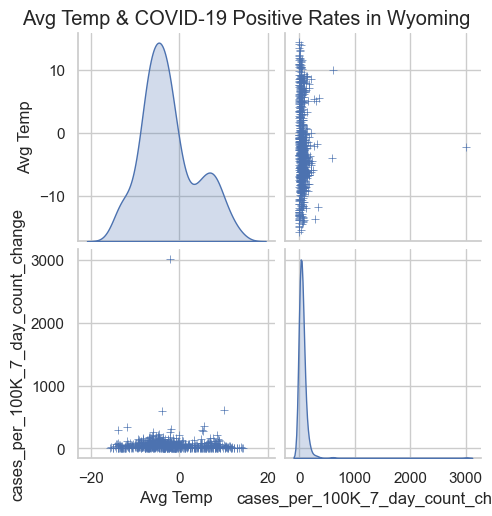

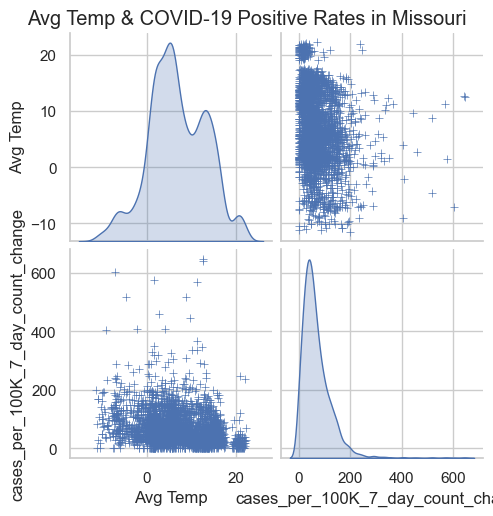

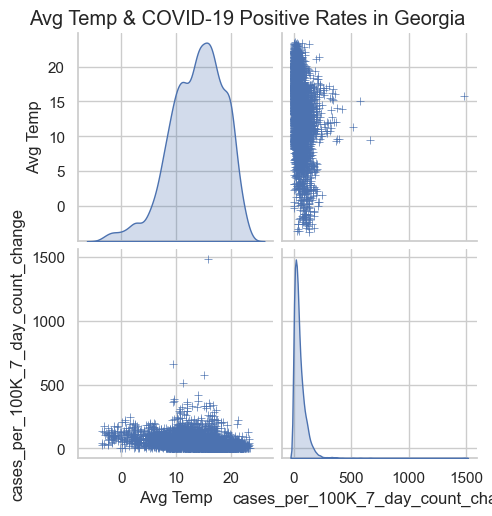

In [12]:
# Define the list of states
states_list = ['Washington', 'Wyoming', 'Missouri', 'Georgia']

# Loop through each state and create a pair plot
for state in states_list:
    # Filter the dataset for the current state
    df_state = df[df['State'] == state]
    
    # Select the necessary columns: Avg Temp & COVID Positive Rates, each marker represents a county within the selected state
    df_avg_temp = df_state[['Week', 'County', 'Avg Temp', 'cases_per_100K_7_day_count_change']].dropna()

    # Create the pair plot for Avg Temp and COVID Positive Rates with counties colored differently
    sns.pairplot(df_avg_temp, diag_kind="kde", markers='+')
    
    # Set the title for the plot
    plt.suptitle(f'Avg Temp & COVID-19 Positive Rates in {state}', y=1.02)
    
    # Show the plot
    plt.show()


AVG TEMP & COVID (state over time, USA over time)

~ TIME SERIES PLOT

C:\Users\madis\AppData\Local\Temp\ipykernel_40464\1946174884.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


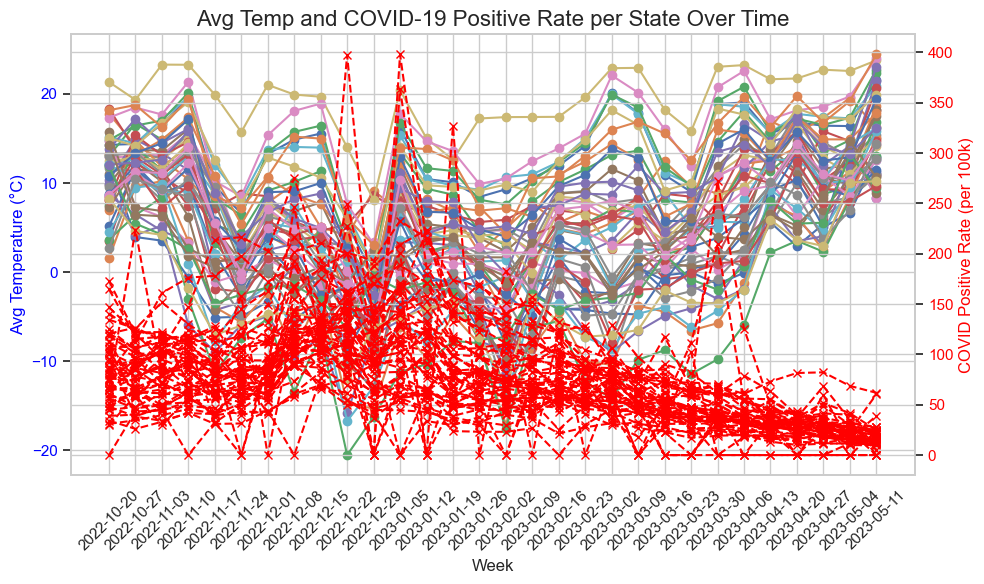

In [13]:
#group by state and week, calculate avg temp and positive rate per state
df_grouped = df.groupby(['State', 'Week']).agg({
    'Avg Temp': 'mean',  
    'cases_per_100K_7_day_count_change': 'mean' 
}).reset_index()

#plot avg temp and covid positive rates per state (51 lines for avg temp, 51 lines for pos rates)
fig, ax1 = plt.subplots(figsize=(10, 6))

#plot avg temp for each state
for state in df_grouped['State'].unique():
    state_data = df_grouped[df_grouped['State'] == state]
    ax1.plot(state_data['Week'], state_data['Avg Temp'], marker='o')

#set y-axis 1 label(avg temp)
ax1.set_xlabel('Week')
ax1.set_ylabel('Avg Temperature (°C)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

#make second y-axis
ax2 = ax1.twinx()

#plot y-axis 2(covid positive rate)
for state in df_grouped['State'].unique():
    state_data = df_grouped[df_grouped['State'] == state]
    ax2.plot(state_data['Week'], state_data['cases_per_100K_7_day_count_change'], marker='x', linestyle='--', color='red')

#set y-axis 2 label(covid positive rate)
ax2.set_ylabel('COVID Positive Rate (per 100k)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

#rotate week ticks
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

plt.title('Avg Temp and COVID-19 Positive Rate per State Over Time', fontsize=16)
plt.tight_layout()

plt.show()

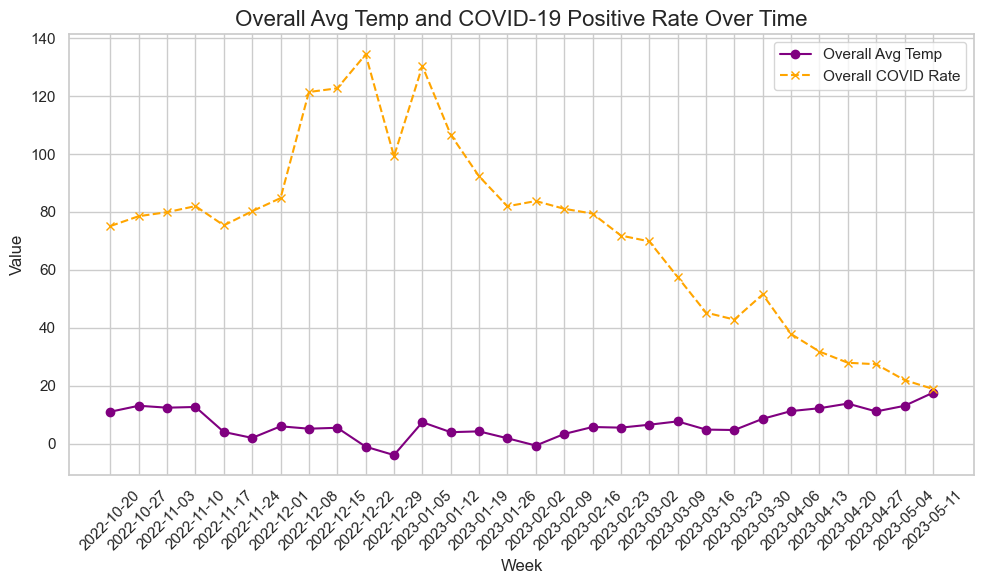

In [14]:
#plot avg temp and covid positive rates for all of USA + puerto rico (1 line for avg temp, 1 line for pos rates)
plt.figure(figsize=(10, 6))

#group by week(state doesn't matter bc taking average of everything)
df_grouped_overall = df.groupby('Week').agg({
    'Avg Temp': 'mean',
    'cases_per_100K_7_day_count_change': 'mean'
}).reset_index()

#plot overall avg temp 
plt.plot(df_grouped_overall['Week'], df_grouped_overall['Avg Temp'], marker='o', color='purple', label='Overall Avg Temp')

#plot overall covid 19 positive rates
plt.plot(df_grouped_overall['Week'], df_grouped_overall['cases_per_100K_7_day_count_change'], marker='x', linestyle='--', color='orange', label='Overall COVID Rate')

plt.xlabel('Week')
plt.ylabel('Value')
plt.title('Overall Avg Temp and COVID-19 Positive Rate Over Time', fontsize=16)

plt.xticks(rotation=45)

#display legend
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

~ PAIR PLOT

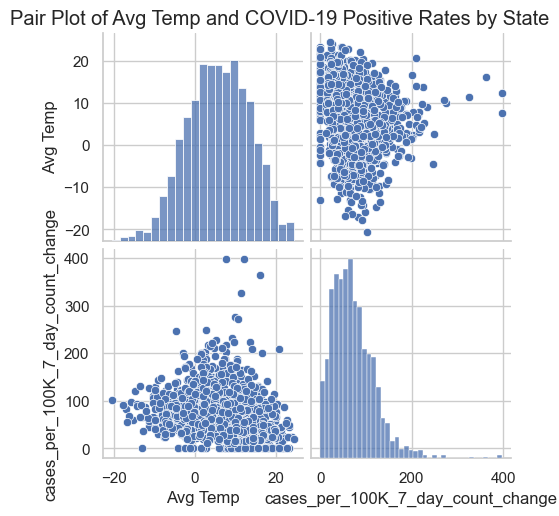

In [15]:
# Group by state and week, calculate avg temp and positive rate for all states and Puerto Rico
df_grouped = df.groupby(['State', 'Week']).agg({
    'Avg Temp': 'mean',  
    'cases_per_100K_7_day_count_change': 'mean' 
}).reset_index()

# Ensure Puerto Rico is included in the pair plot data
pair_plot_data = df_grouped[['Avg Temp', 'cases_per_100K_7_day_count_change', 'State']]

# Initialize the pair plot, each marker representing a state
sns.set(style='whitegrid')
pair_plot = sns.pairplot(pair_plot_data, markers='o')

# Set the title for the pair plot
pair_plot.fig.suptitle('Pair Plot of Avg Temp and COVID-19 Positive Rates by State', y=1.02)

# Show the pair plot
plt.show()

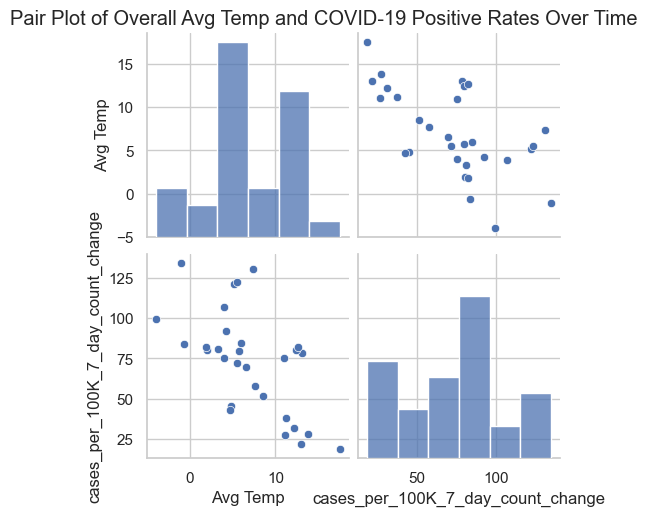

In [16]:
# Group by week to calculate overall avg temp and positive rate for all states and Puerto Rico
df_grouped_overall = df.groupby('Week').agg({
    'Avg Temp': 'mean',
    'cases_per_100K_7_day_count_change': 'mean'
}).reset_index()

# Create a pair plot for the overall averages
pair_plot_data = df_grouped_overall[['Avg Temp', 'cases_per_100K_7_day_count_change']]

# Initialize the pair plot, each marker representing an averaged state
sns.set(style='whitegrid')
pair_plot = sns.pairplot(pair_plot_data, markers='o')

# Set the title for the pair plot
pair_plot.fig.suptitle('Pair Plot of Overall Avg Temp and COVID-19 Positive Rates Over Time', y=1.02)

# Remove the legend if it exists
for ax in pair_plot.axes.flatten():
    if ax.legend_ is not None:
        ax.legend_.remove()  # Remove the legend for each subplot

# Show the pair plot
plt.show()